# 🧠 Algoritmo de Bagging en Machine Learning

## 📘 Definición
**Bagging** (*Bootstrap Aggregating*) es un método de **aprendizaje por ensamble** que busca mejorar la precisión y estabilidad de los modelos de machine learning.  
Su objetivo principal es **reducir la varianza** y evitar el **sobreajuste (overfitting)**.

---

## ⚙️ Cómo Funciona

1. **Bootstrap Sampling (Muestreo con reemplazo):**  
   Se crean múltiples subconjuntos de datos aleatorios *con reemplazo* a partir del conjunto de entrenamiento original.  
   ➜ Esto significa que algunos ejemplos pueden repetirse y otros quedar fuera.

2. **Entrenamiento de múltiples modelos:**  
   Se entrena un **modelo independiente** (por ejemplo, un árbol de decisión, red neuronal, etc.) en cada subconjunto.

3. **Combinación de resultados:**
   - **Regresión:** Se combinan las predicciones mediante el **promedio** de las salidas.  
   - **Clasificación:** Se combinan mediante **votación por mayoría** de los modelos.

---

## 🧩 Características Clave

- Puede aplicarse a muchos clasificadores, incluidos:
  - **ANN** (Redes Neuronales Artificiales)
  - **CART** (Árboles de Clasificación y Regresión)
  - Otros modelos supervisados.

- Los modelos se entrenan **en paralelo** y de forma **independiente**.

---

## 📚 Referencia en Scikit-Learn
Scikit-Learn implementa este método mediante:
- `BaggingClassifier` → para clasificación  
- `BaggingRegressor` → para regresión  



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.dropna(inplace=True)
df['pclass'].unique()

array([1, 3, 2])

In [4]:
df['pclass'].value_counts()

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [5]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['sex'].value_counts()

sex
male      94
female    88
Name: count, dtype: int64

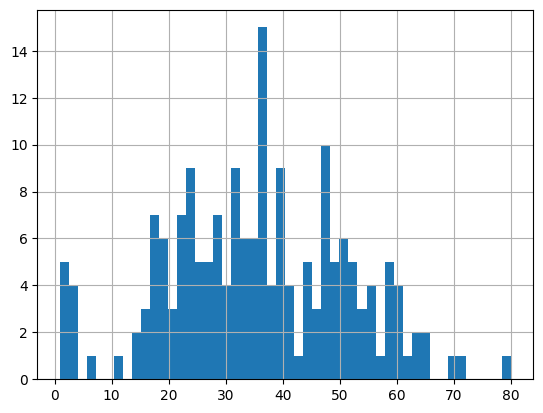

In [ ]:
df['age'].hist(bins=50)

---
## Pre-procesado de datos

In [8]:
from sklearn import preprocessing

X = df[['pclass', 'sex', 'age']]
lb = preprocessing.LabelBinarizer()
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\PcVIP\AppData\Local\Temp\ipykernel_11060\527552072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


In [9]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [10]:
X.shape

(182, 3)

In [11]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [13]:
y = df['survived']
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

---
## Fit model

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

---
## Arbol de decision

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      0.93      0.96        85

    accuracy                           0.94       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[41  1]
 [ 6 79]]

ROC AUC: 0.9528

Average Accuracy: 	 0.8045
Accuracy SD: 		 0.0909


In [26]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.82      0.87      0.85        38

    accuracy                           0.78        55
   macro avg       0.75      0.73      0.74        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[10  7]
 [ 5 33]]

ROC AUC: 0.7283



---
## Bagging# 🧠 Bagging — Parámetro `oob_score=False`

## 📘 ¿Qué es Bagging?

**Bagging** (*Bootstrap Aggregating*) es una técnica de *ensemble learning* que entrena varios modelos base en subconjuntos aleatorios del conjunto de entrenamiento (usando muestreo **con reemplazo**) y luego combina sus resultados para mejorar la precisión y estabilidad.


In [30]:
bag_clf = BaggingClassifier(n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

,estimator,None
,n_estimators,1000
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [31]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      0.93      0.96        85

    accuracy                           0.94       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[41  1]
 [ 6 79]]

ROC AUC: 0.9528

Average Accuracy: 	 0.8045
Accuracy SD: 		 0.0909


In [32]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.82      0.87      0.85        38

    accuracy                           0.78        55
   macro avg       0.75      0.73      0.74        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[10  7]
 [ 5 33]]

ROC AUC: 0.7283



# 🧠 Bagging (`oob_score=True`)

## 📘 Descripción general

En el algoritmo **Bagging** (*Bootstrap Aggregating*), el parámetro `oob_score=True` activa el uso de **muestras fuera de la bolsa** (*Out-of-Bag samples*) para **estimar la precisión de generalización** del modelo.

---

## 📊 ¿Qué significa “Out-of-Bag”?

Durante el proceso de entrenamiento con Bagging:
- Cada modelo base (por ejemplo, un árbol de decisión) se entrena con un subconjunto de los datos obtenido mediante **muestreo con reemplazo** (*bootstrap sampling*).
- En promedio, **solo el 63%** de los datos originales se utilizan para entrenar un modelo dado.
- El **37% restante**, que no fue elegido, se conoce como **Out-of-Bag (OOB)** —es decir, "fuera de la bolsa".

Estas muestras **no vistas por el modelo durante el entrenamiento** se usan como un **conjunto de validación interno** para medir su rendimiento.

---

In [33]:
bag_clf = BaggingClassifier(n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

,estimator,None
,n_estimators,1000
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [34]:
bag_clf.oob_score_

0.8110236220472441

In [35]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      0.93      0.96        85

    accuracy                           0.94       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[41  1]
 [ 6 79]]

ROC AUC: 0.9528

Average Accuracy: 	 0.8045
Accuracy SD: 		 0.0909


In [36]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.82      0.87      0.85        38

    accuracy                           0.78        55
   macro avg       0.75      0.73      0.74        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[10  7]
 [ 5 33]]

ROC AUC: 0.7283

